### 가락시장 광어(양식) 가격 변화 그래프


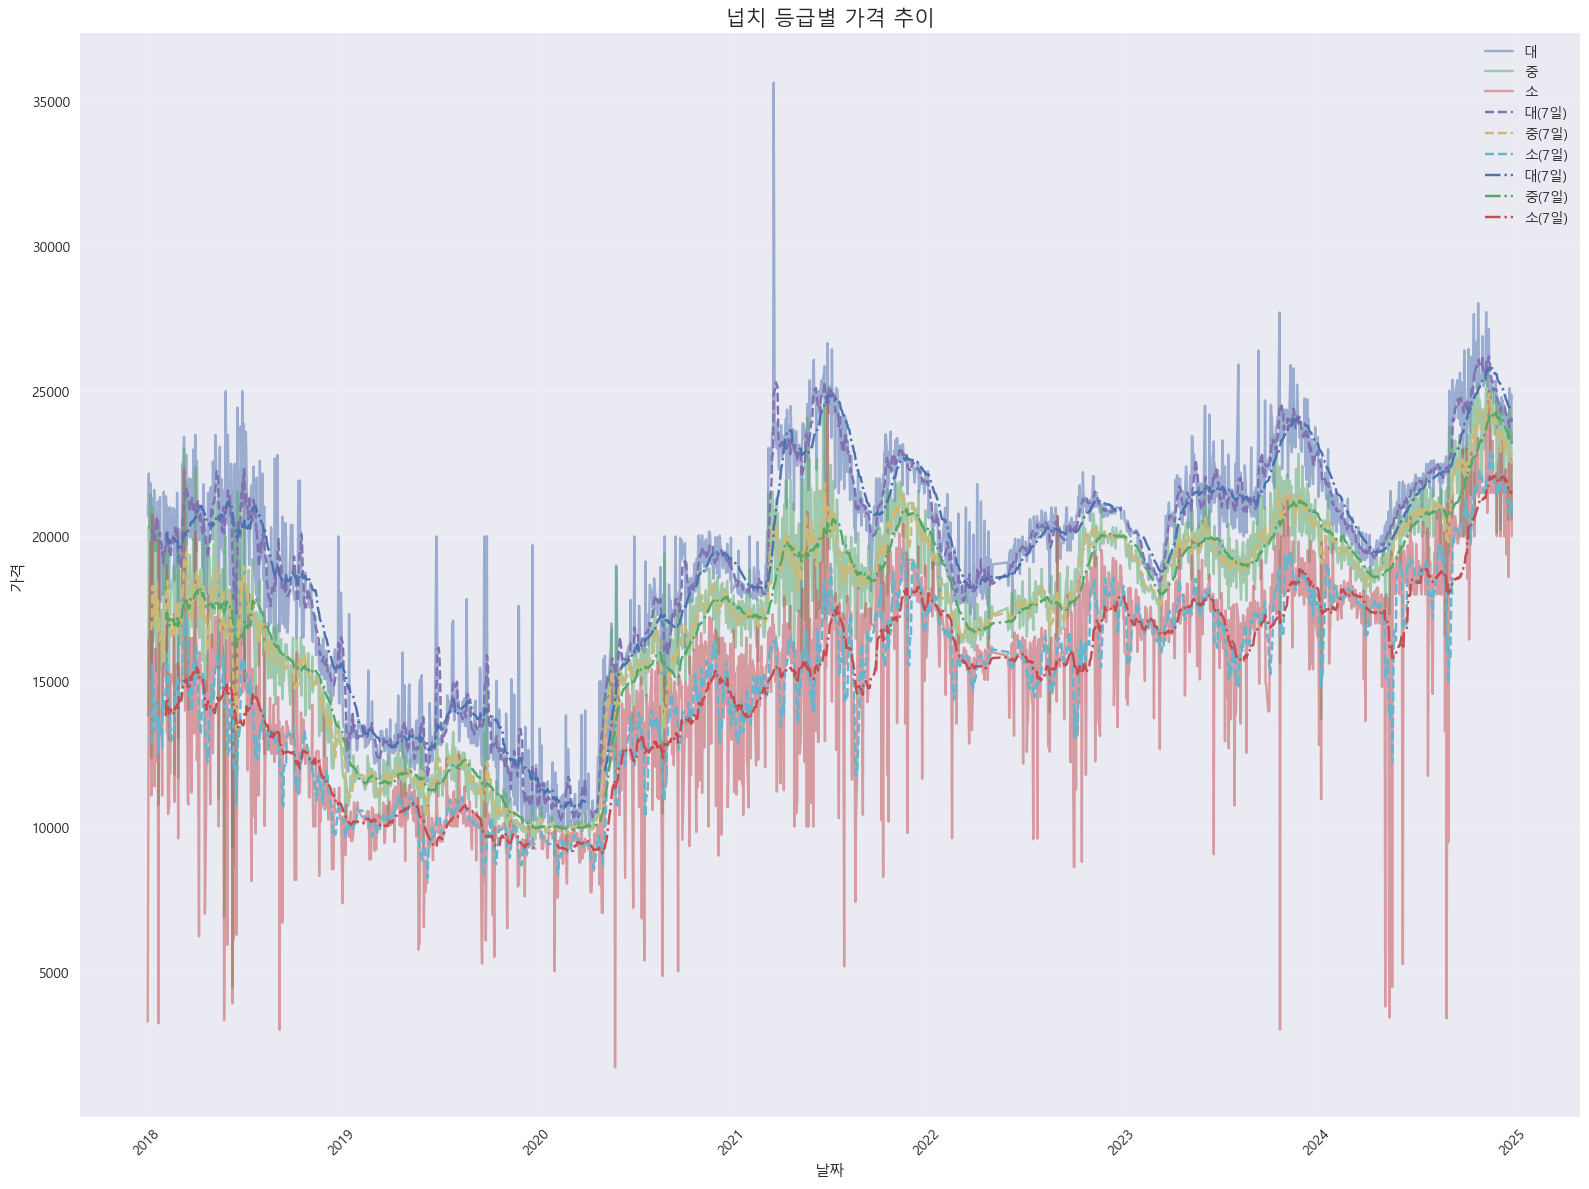

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

#한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#데이터 읽기
df = pd.read_csv('넙치가격_등급별.csv', encoding='utf-8')

# 날짜 칼럼을 날짜 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 7일 이동평균
ma_대_7 = df['대'].rolling(window=7).mean()
ma_중_7 = df['중'].rolling(window=7).mean()
ma_소_7 = df['소'].rolling(window=7).mean()

# 30일 이동평균
ma_대_30 = df['대'].rolling(window=30).mean()
ma_중_30 = df['중'].rolling(window=30).mean()
ma_소_30 = df['소'].rolling(window=30).mean()

# 그래프 크기 설정
plt.figure(figsize=(16,12))

# 실제 가격 그래프
plt.plot(df['날짜'], df['대'], label='대',  alpha=0.5)
plt.plot(df['날짜'], df['중'], label='중',  alpha=0.5)
plt.plot(df['날짜'], df['소'], label='소',  alpha=0.5)

# 이동평균선 (7일)
plt.plot(df['날짜'], ma_대_7, label='대(7일)', linestyle='--')
plt.plot(df['날짜'], ma_중_7, label='중(7일)',  linestyle='--')
plt.plot(df['날짜'], ma_소_7, label='소(7일)',  linestyle='--')

# 이동평균선 (30일)
plt.plot(df['날짜'], ma_대_30, label='대(7일)', linestyle='-.')
plt.plot(df['날짜'], ma_중_30, label='중(7일)',  linestyle='-.')
plt.plot(df['날짜'], ma_소_30, label='소(7일)',  linestyle='-.')

# 그래프 스타일
plt.title("넙치 등급별 가격 추이", size=15)
plt.xlabel("날짜")
plt.ylabel("가격")
plt.grid(True, alpha=0.2)
plt.legend()

# x축 레이블 각도
plt.xticks(rotation=45)

# 여백 조정
plt.tight_layout()

# 그래프 저장
# plt.savefig("넙치가격추이.png", dpi=300, bbox_inches="tight")
plt.show()

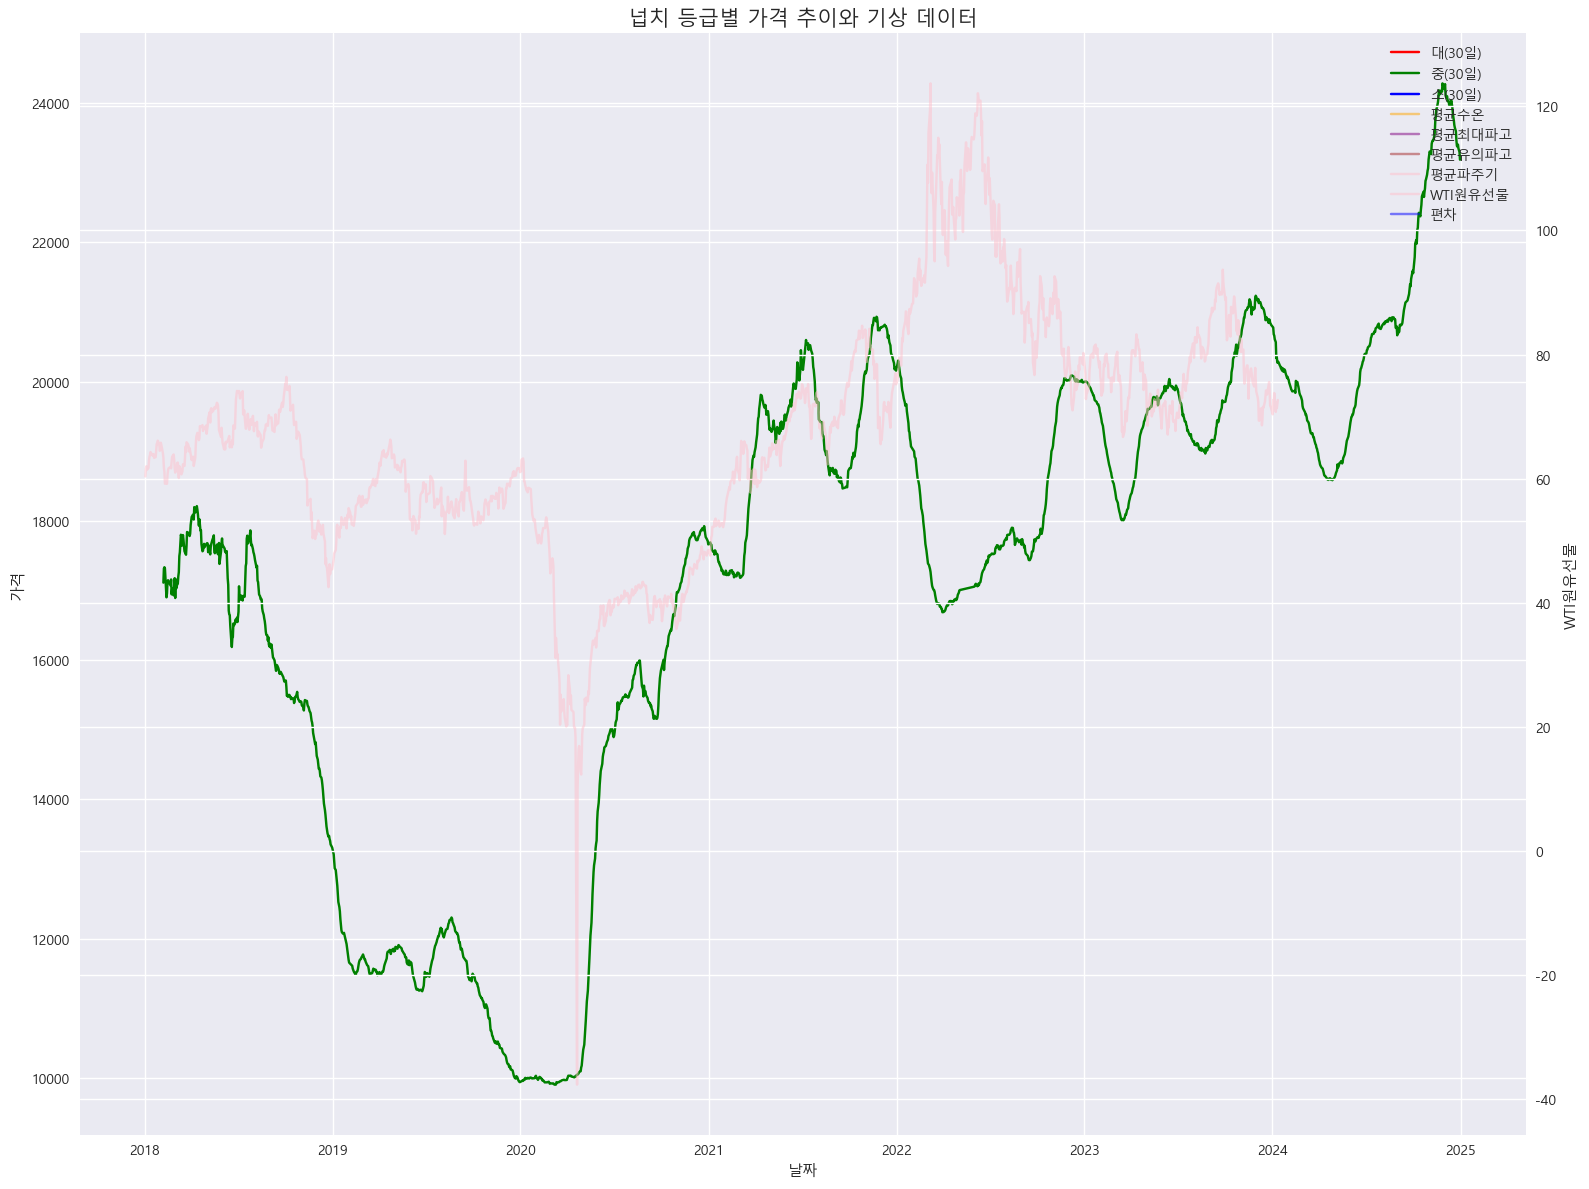

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl

#한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#데이터 읽기
df = pd.read_csv('넙치가격_등급별.csv', encoding='utf-8')
weather_df = pd.read_csv('서귀포_평균수온등.csv', encoding='utf-8')
wti_df = pd.read_csv('wti_daily_prices.csv', encoding='utf-8')
temp_dev_df = pd.read_csv('마라도_수온_예측_편차.csv', encoding='utf-8')

# 날짜 칼럼을 날짜 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'])
wti_df['날짜'] = pd.to_datetime(wti_df['Date'])
temp_dev_df['날짜'] = pd.to_datetime(temp_dev_df['날짜'])

# 7일 이동평균
ma_대_7 = df['대'].rolling(window=7).mean()
ma_중_7 = df['중'].rolling(window=7).mean()
ma_소_7 = df['소'].rolling(window=7).mean()

# 30일 이동평균
ma_대_30 = df['대'].rolling(window=30).mean()
ma_중_30 = df['중'].rolling(window=30).mean()
ma_소_30 = df['소'].rolling(window=30).mean()

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(16,12))

# 넙치 가격 
ax1.set_xlabel('날짜')
ax1.set_ylabel('가격')

# # 실제 가격 그래프
# plt.plot(df['날짜'], df['대'], label='대',  alpha=0.5)
# plt.plot(df['날짜'], df['중'], label='중',  alpha=0.5)
# plt.plot(df['날짜'], df['소'], label='소',  alpha=0.5)

# # 이동평균선 (7일)
# plt.plot(df['날짜'], ma_대_7, label='대(7일)', linestyle='--')
# plt.plot(df['날짜'], ma_중_7, label='중(7일)',  linestyle='--')
# plt.plot(df['날짜'], ma_소_7, label='소(7일)',  linestyle='--')

# 이동평균선 (30일)
#line1 = ax1.plot(df['날짜'], ma_대_30, label='대(30일)', linestyle='-', color='red')
line2 = ax1.plot(df['날짜'], ma_중_30, label='중(30일)', linestyle='-', color='green')
#line3 = ax1.plot(df['날짜'], ma_소_30, label='소(30일)', linestyle='-', color='blue')

# 오른쪽 y축 생성
ax2 = ax1.twinx()
#ax2.set_ylabel('기상 데이터')
ax2.set_ylabel('WTI원유선물')

# 30일 이동평균유의
ma_평균최대파고_30 = weather_df['평균수온(섭씨)'].rolling(window=30).mean()
ma_평균최대파고_30 = weather_df['평균최대파고(m)'].rolling(window=30).mean()
ma_평균유의파고_30 = weather_df['평균유의파고(m)'].rolling(window=30).mean()
ma_평균파주기_30 = weather_df['평균파주기(sec)'].rolling(window=30).mean()

# 기상청 데이터 그래프 (오른쪽 y축)
# #line4 = ax2.plot(weather_df['날짜'], weather_df['평균수온(섭씨)'], label='평균수온', color='orange', alpha=0.5)
# line5 = ax2.plot(weather_df['날짜'], weather_df['평균최대파고(m)'], label='평균최대파고', color='purple', alpha=0.5)
# line6 = ax2.plot(weather_df['날짜'], weather_df['평균유의파고(m)'], label='평균유의파고', color='brown', alpha=0.5)
# line7 = ax2.plot(weather_df['날짜'], weather_df['평균파주기(sec)'], label='평균파주기', color='pink', alpha=0.5)

# 기상청 데이터 그래프 (오른쪽 y축) - 이동평균균
# line4 = ax2.plot(weather_df['날짜'], weather_df['평균수온(섭씨)'], label='평균수온', color='orange', alpha=0.5)
#line5 = ax2.plot(weather_df['날짜'],ma_평균최대파고_30, label='평균최대파고', color='purple', alpha=0.5)
#line6 = ax2.plot(weather_df['날짜'], ma_평균유의파고_30 , label='평균유의파고', color='brown', alpha=0.5)
#line7 = ax2.plot(weather_df['날짜'], ma_평균파주기_30, label='평균파주기', color='pink', alpha=0.5)

# WTI 데이터
line8 = ax2.plot(wti_df['날짜'], wti_df['WTI원유선물'], label='WTI원유선물', color='pink', alpha=0.5)

# 해수온도 편차
#line9 = ax2.plot(temp_dev_df['날짜'], temp_dev_df['편차'], label='편차', color='blue', alpha=0.5)
temp_dev_df

# 모든 선을 하나의 범례로 결합
lines = line1 + line2 + line3 + line4 + line5 + line6 + line7 + line8 + line9
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

# 그래프 제목
plt.title("넙치 등급별 가격 추이와 기상 데이터", size=15)
#plt.legend()

# x축 레이블 각도
plt.xticks(rotation=45)

# 여백 조정
plt.tight_layout()

# 그래프 저장
# plt.savefig("넙치가격추이.png", dpi=300, bbox_inches="tight")
plt.show()